<a href="https://colab.research.google.com/github/Givemeeee/Flowers/blob/main/Flower_nation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Activation,Conv2D,MaxPool2D
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
資料清洗環節
'''
path1 ='/content/drive/MyDrive/Colab Notebooks/三民ml/flowerdataset/train'
path2 ='/content/drive/MyDrive/Colab Notebooks/三民ml/flowerdataset/test'
files = os.listdir(path1)
tfiles = os.listdir(path2)
directiories = list()

In [ ]:
files

['Daisy',
 'Dandelion',
 'Orchid',
 'Sunflower',
 'Lilly',
 'Tulip',
 'Lotus',
 'Rose']

In [ ]:
tfiles

['Daisy',
 'Lotus',
 'Rose',
 'Dandelion',
 'Tulip',
 'Sunflower',
 'Lilly',
 'Orchid']

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for dir in files:
  if os.path.isdir(os.path.join(path1,dir)):
    directiories.append(dir)
(directiories)

['Daisy',
 'Dandelion',
 'Orchid',
 'Sunflower',
 'Lilly',
 'Tulip',
 'Lotus',
 'Rose']

In [ ]:
# 訓練集資料
train_data_path = path1

# 列出花的目錄
flower_classes = os.listdir(train_data_path)
print("Flower Classes:", flower_classes)

# 計算所有圖片數量
for flower_class in flower_classes:
    class_path = os.path.join(train_data_path, flower_class)
    num_images = len(os.listdir(class_path))
    print(f"{flower_class}: {num_images} images")

Flower Classes: ['Daisy', 'Dandelion', 'Orchid', 'Sunflower', 'Lilly', 'Tulip', 'Lotus', 'Rose']
Daisy: 392 images
Dandelion: 385 images
Orchid: 397 images
Sunflower: 393 images
Lilly: 394 images
Tulip: 393 images
Lotus: 397 images
Rose: 397 images


In [ ]:
# 顯示所有測試集資料內容
train_data_path = path2

# 列出所有目錄
flower_classes = os.listdir(train_data_path)
print("Flower Classes:", flower_classes)

# 計算有多少張圖片
for flower_class in flower_classes:
    class_path = os.path.join(train_data_path, flower_class)
    num_images = len(os.listdir(class_path))
    print(f"{flower_class}: {num_images} images")

Flower Classes: ['Daisy', 'Lotus', 'Rose', 'Dandelion', 'Tulip', 'Sunflower', 'Lilly', 'Orchid']
Daisy: 89 images
Lotus: 101 images
Rose: 97 images
Dandelion: 94 images
Tulip: 100 images
Sunflower: 101 images
Lilly: 100 images
Orchid: 89 images


In [ ]:
def resize_and_keep_aspect_ratio(dir_path, img_files, target_size=(256, 256)):
    for item in img_files:
        item_path = os.path.join(dir_path, item)  # 確保路徑正確
        image = cv2.imread(item_path)

        if image is None:
            print(f"Error reading file {item_path}")  # 如果文件讀取有誤，打印錯誤信息
            continue

        # 原始圖片尺寸
        h, w = image.shape[:2]

        # 計算縮放比例
        scale = min(target_size[0] / w, target_size[1] / h)

        # 應用縮放比例
        new_w, new_h = int(w * scale), int(h * scale)
        resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # 創建一個新的256x256的背景
        new_image = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)

        # 計算貼上位置
        x_offset = (target_size[0] - new_w) // 2
        y_offset = (target_size[1] - new_h) // 2

        # 將縮放後的圖片貼到中間
        new_image[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized_image

        # 保存調整後的圖片
        save_path = os.path.join(dir_path, 'resize', item)  # 確保保存路徑正確
        if not os.path.exists(os.path.join(dir_path, 'resize')):
            os.makedirs(os.path.join(dir_path, 'resize'))
        cv2.imwrite(save_path, new_image)



In [ ]:
def creat_data(path, category, x_list, y_list):
    for p in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, p))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_list.append(img_array)
        y_list.append(category)

In [ ]:
category = 0

def process_data(path, category, x_list, y_list):
    directories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    for directory in directories:
        dir_path = os.path.join(path, directory)
        img_files = [file for file in os.listdir(dir_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
        resizeDir = os.path.join(dir_path, 'resize')
        if not os.path.exists(resizeDir):
            os.makedirs(resizeDir)
        if img_files:
            resize_and_keep_aspect_ratio(dir_path, img_files)
        else:
            print(f"No image files found in {dir_path}")
        creat_data(resizeDir, category, x_list, y_list)
        category += 1

In [ ]:
process_data(path1, category, x_train, y_train)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
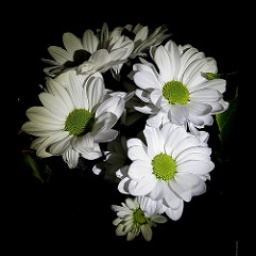

In [ ]:
x_train[0]

In [ ]:
y_train[391]

1

In [ ]:
len(y_train)

3140

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train/255 #色階
y_train = np_utils.to_categorical(y_train)

#x_test = np.array(x_test).reshape(-1,256,256,3)
#y_test = np.array(y_test)

#x_test = x_test/255 #色階
#y_test = np_utils.to_categorical(y_test)


In [ ]:
x_train[4]

array([[[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ]],

       [[0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

建模


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu')) #input 為抓取長、寬、通道
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {Y_train.shape}")

Shape of X_train: (2512, 256, 256, 3)
Shape of y_train: (2512, 8)


In [ ]:
history=model.fit(X_train, Y_train, batch_size=64, epochs=20, validation_split=0.2,callbacks=[reduce_lr,early_stopping])

loss, accuracy = model.evaluate(X_train, Y_train)

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/三民ml/flowerdataset/flowerFinal3.kreas')

In [ ]:
def show_history(train_history,train,validation):
  # Visualize training history
  plt.figure(figsize=(12, 6))

  # Plot training & validation accuracy values
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.tight_layout()
  plt.show()

In [ ]:
show_history(history,'accuracy','val_accuracy')

In [ ]:
pre = model.predict(X_test)

In [ ]:
right=0
for i in range(len(pre)):
    prediction=np.argmax(pre[i])
    press = Y_test[i][prediction]
    if press == 1:
        right += 1
right / len(pre)

In [ ]:
process_data(path2, category, x_test, y_test) #驗證集資料處理
x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test/255 #色階
y_test = np_utils.to_categorical(y_test)

In [ ]:
# 因為驗證集的資料目錄與訓練集的不同，所以要做統一onehot
all_classes = ['Daisy', 'Dandelion', 'Orchid', 'Sunflower', 'Lilly', 'Tulip', 'Lotus', 'Rose']


In [ ]:
# 創建類別到索引的映射字典
class_to_index = {cls: index for index, cls in enumerate(all_classes)}


In [ ]:
train_labels = ['Daisy', 'Dandelion', 'Orchid', 'Sunflower', 'Lilly', 'Tulip', 'Lotus', 'Rose']
val_labels = ['Daisy', 'Lotus', 'Rose', 'Dandelion', 'Tulip', 'Sunflower', 'Lilly', 'Orchid']
def to_one_hot(labels, class_to_index):
    num_classes = len(class_to_index)
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        index = class_to_index[label]
        one_hot_labels[i, index] = 1
    return one_hot_labels


train_labels_one_hot = to_one_hot(train_labels, class_to_index)
val_labels_one_hot = to_one_hot(val_labels, class_to_index)



print("訓練集標籤的one-hot編碼：\n", train_labels_one_hot)
print("驗證集標籤的one-hot編碼：\n", val_labels_one_hot)


In [ ]:
print("X_train shape:", X_train.shape)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)
print("X_test shape:", X_test.shape)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)

In [ ]:
pred = model.predict(x_test)

In [ ]:
right=0
for i in range(len(pred)):
    prediction=np.argmax(pred[i])
    press = y_test[i][prediction]
    if press == 1:
        right += 1
right / len(pre)

使用ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,  # 隨機旋轉圖片
    width_shift_range=0.2,  # 水平移動圖片
    height_shift_range=0.2,  # 垂直移動圖片
    shear_range=0.2,  # 剪切強度
    zoom_range=0.2,  # 隨機縮放強度
    horizontal_flip=True,  # 隨機水平翻轉
    fill_mode='nearest'  # 填充新創建像素的方法
)

In [ ]:
train_generator = train_datagen.flow(X_train,Y_train, batch_size=32)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu')) #input 為抓取長、寬、通道
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=(X_test,Y_test)
)


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train)

In [ ]:
pre = model.predict(X_test)

In [ ]:
right=0
for i in range(len(pre)):
    prediction=np.argmax(pre[i])
    press = Y_test[i][prediction]
    if press == 1:
        right += 1
right / len(pre)

使用eff7

In [ ]:
base_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(256, 256, 3), pooling='avg')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Build a sequential model on top of the pre-trained base model
model = Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

In [ ]:
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),validation_split=0.1)


In [ ]:
loss, accuracy = model.evaluate(rX_train, ry_train)